# Introdução

Neste estudo, investigaremos a possível correlação entre as **horas de estudo** realizadas pelos alunos e suas **notas** obtidas em avaliações. A pergunta central é: **Existe uma relação significativa entre o tempo dedicado aos estudos e o desempenho acadêmico?**

# Dataset

O dataset de estudo foi obtido através do site do Kaggle: www.kaggle.com

O dataset contém informações sobre as horas de estudo e as notas de um grupo de alunos. Vamos explorar esses dados para entender melhor essa relação.

In [24]:
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib

In [27]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [28]:
# Carregamento do dataset
df = pd.read_csv('score.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [29]:
# Gerando estatísticas descritivas do nosso dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [30]:
# Vericamos se existe correlação entre as horas de estudo e as notas dos alunos
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


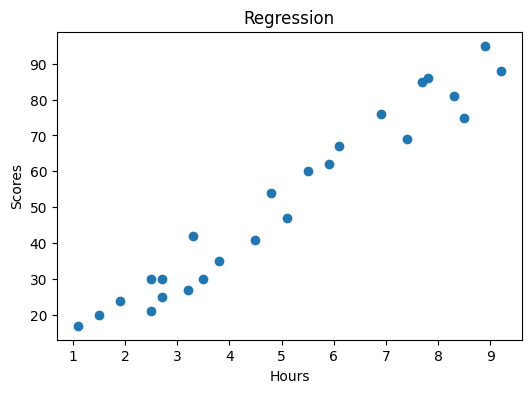

In [32]:
# Criamos um gráfico para visualizarmos a relação entre as variáveis
plt.figure(figsize = (6,4))
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression')
plt.show()
     

In [33]:
# Separamos as variáveis de interesse e colocamos em um array
X = df['Hours'].values
y = df['Scores'].values

In [34]:
X, y

(array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
        3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [35]:
# Colocamos a variável X (as horas de estudo) em uma matriz para que possa ser usada pela biblioteca sklearn
X = X.reshape(-1, 1)

In [36]:
# Intanciamos a função de Regressão Linear e utilizamos nossas varáveis para treinamento
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [37]:
# Visualização do intercepto
regressor.intercept_

np.float64(2.48367340537321)

In [38]:
# Visualização do coeficiente
regressor.coef_

array([9.77580339])

In [39]:
# Fazendo previsões com o modelo
previsoes = regressor.predict(X)
previsoes

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

In [40]:
# Para 4h de estudo o modelo prevê pontuação de aproximadamente 41 pontos
regressor.predict([[4]])

array([41.58688697])

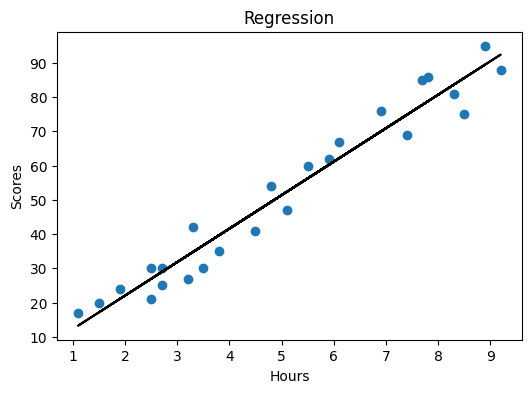

In [44]:
# Criamos um gráfico para visualizar os dados de treinamento e alinha de regressão prevista
plt.figure(figsize = (6,4))
plt.scatter(df['Hours'], df['Scores'])
plt.plot(X, previsoes, 'k') 
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression')
plt.show()
     

In [46]:
# Precisão do modelo
regressor.score(X, y)

0.9529481969048356